In [ ]:
#install dependencies

# !pip install tensorflow
# !pip install keras
#import tensorflow as tf
#from tensorflow import keras
import pandas as pd
import requests
import numpy as np
from PIL import Image
%matplotlib inline
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pathlib import Path
import os


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U -q PyDrive

In [ ]:
os.chdir("/content/drive/My Drive/FinalProjectData/Data/TACO/")
os.listdir()

['README.md',
 '.gitignore',
 'demo.ipynb',
 'all_image_urls.csv',
 'LICENSE',
 'annotations_unofficial.json',
 'annotations.json',
 'requirements.txt',
 'download.py',
 'detector',
 '.git',
 'map_1.csv',
 'map_2.csv',
 'map_3.csv',
 'map_4.csv',
 'map_10.csv',
 'map_17.csv',
 '.ipynb_checkpoints',
 'fotos',
 'answers.joblib',
 'asd.gv',
 'asd.gv.pdf',
 'results.csv']

In [ ]:
with open('annotations.json') as json_file:
    Dataset = json.load(json_file)

Some stats...

In [ ]:
categories = Dataset['categories']
anns = Dataset['annotations']
imgs = Dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    #this one I stole
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


**`CATEGORIES`**

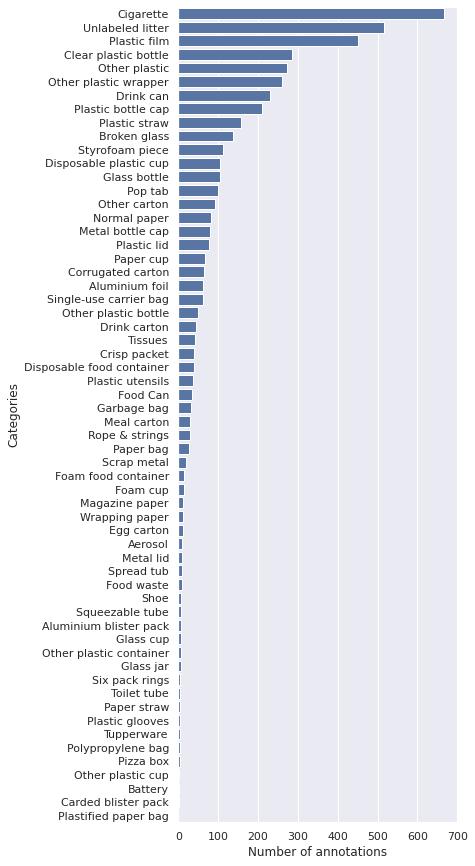

In [ ]:
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

f, ax = plt.subplots(figsize=(5,15))

df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")


**`SUPERCATEGORIES`**

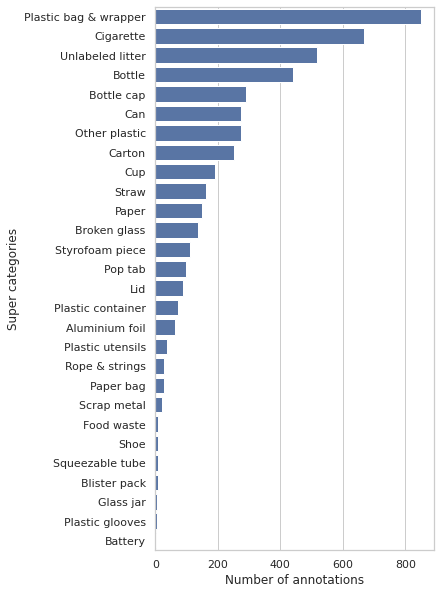

In [ ]:
cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1
    
f, ax = plt.subplots(figsize=(5,10))

# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b")


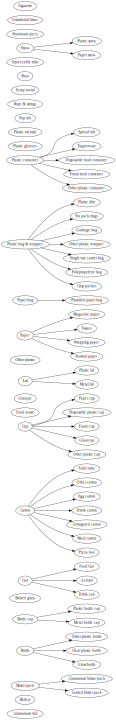

In [ ]:
#visualize graph of images in categories and supercategories
from graphviz import Digraph

dot = Digraph('Dataset graph', filename='asd.gv')
dot.attr(rankdir='LR', size='8,10')

for cat_it in categories:
    dot.node(cat_it['name'])
    if cat_it['name']==cat_it['supercategory']:
        dot.node(cat_it['supercategory'])
    else:
        dot.edge(cat_it['supercategory'], cat_it['name'])
dot

# **PARSING JSON**

In [ ]:
Dataset.keys()

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])

IMAGES

In [ ]:
images = pd.DataFrame(Dataset['images']).rename(columns={'id': 'image_id'}).set_index('image_id')
images = images.drop(['license', 'coco_url', 'date_captured'], axis=1)
images.head()

,width,height,file_name,flickr_url,flickr_640_url
image_id,,,,,
0,1537,2049,batch_1/000006.jpg,https://farm66.staticflickr.com/65535/33978196...,https://farm66.staticflickr.com/65535/33978196...
1,1537,2049,batch_1/000008.jpg,https://farm66.staticflickr.com/65535/47803331...,https://farm66.staticflickr.com/65535/47803331...
2,1537,2049,batch_1/000010.jpg,https://farm66.staticflickr.com/65535/40888872...,https://farm66.staticflickr.com/65535/40888872...
3,2049,1537,batch_1/000019.jpg,https://farm66.staticflickr.com/65535/47803331...,https://farm66.staticflickr.com/65535/47803331...
4,1537,2049,batch_1/000026.jpg,https://farm66.staticflickr.com/65535/33978199...,https://farm66.staticflickr.com/65535/33978199...


ANNOTATIONS

In [ ]:
annotations = pd.DataFrame(Dataset['annotations']).set_index('image_id').rename(columns={'id': 'anno_id'})
annotations.tail()

,anno_id,category_id,segmentation,area,bbox,iscrowd
image_id,,,,,,
1498,4779,16,"[[386, 1557, 635, 1567, 986, 1556, 1178, 1550,...",503246.94850,"[228.7143, 1550.0476, 1007.9998999999999, 578....",0
1498,4780,7,"[[1057, 1824, 1041, 1793, 1042, 1758, 1062, 17...",14494.50000,"[1041.3334, 1721.7142, 141.0, 138.0]",0
1499,4781,39,"[[1368, 1775, 1099, 1331, 862, 1494, 1099, 1944]]",154954.10875,"[862.0274, 1331.25, 505.97260000000006, 612.5]",0
1499,4782,14,"[[1096, 1996, 1121, 2069, 1134, 2127, 1177, 22...",28675.00000,"[966.0, 1996.0, 211.0, 336.0]",0
1499,4783,6,"[[1125, 1937, 1135, 2012, 1194, 2013, 1221, 20...",68589.50000,"[1125.0, 1858.0, 234.0, 510.0]",0


CATEGORYS

In [ ]:
supercat = pd.DataFrame(Dataset['categories']).rename(columns={'id': 'category_id'}).set_index('category_id')
supercat.index = supercat.index + 1
supercat.head()


,supercategory,name
category_id,,
1,Aluminium foil,Aluminium foil
2,Battery,Battery
3,Blister pack,Aluminium blister pack
4,Blister pack,Carded blister pack
5,Bottle,Other plastic bottle
